In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
df = pd.read_csv('IMDB.csv')
df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


# Cleaning Dataset: find empty records and fill them

In [3]:
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [4]:
df['Revenue (Millions)'].describe()

count    872.000000
mean      82.956376
std      103.253540
min        0.000000
25%       13.270000
50%       47.985000
75%      113.715000
max      936.630000
Name: Revenue (Millions), dtype: float64

In [5]:
df['Metascore'].describe()

count    936.000000
mean      58.985043
std       17.194757
min       11.000000
25%       47.000000
50%       59.500000
75%       72.000000
max      100.000000
Name: Metascore, dtype: float64

In [6]:
df['Revenue (Millions)'] = df['Revenue (Millions)'].fillna(method='ffill')

In [7]:
df['Metascore'] = df['Metascore'].fillna(method='ffill')

In [8]:
df.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

# 1. Display Top 10 Rows of The Dataset

In [9]:
df.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,151.06,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


# 2. Check Last 10 Rows of The Dataset

In [10]:
df.tail(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
990,991,Underworld: Rise of the Lycans,"Action,Adventure,Fantasy",An origins story centered on the centuries-old...,Patrick Tatopoulos,"Rhona Mitra, Michael Sheen, Bill Nighy, Steven...",2009,92,6.6,129708,45.80,44.0
991,992,Taare Zameen Par,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0
992,993,Take Me Home Tonight,"Comedy,Drama,Romance","Four years after graduation, an awkward high s...",Michael Dowse,"Topher Grace, Anna Faris, Dan Fogler, Teresa P...",2011,97,6.3,45419,6.92,42.0
993,994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
994,995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,54.72,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,58.01,22.0
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


# 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [11]:
print('No of Rows in Dataset: ',df.shape[0])
print('No of Columns in Dataset: ',df.shape[1])

No of Rows in Dataset:  1000
No of Columns in Dataset:  12


# 4. Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  1000 non-null   float64
 11  Metascore           1000 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


# 5. Check Missing Values In The Dataset

# 6. Drop All The  Missing Values

# 7. Check For Duplicate Data

In [13]:
df.duplicated().sum()

0

# 8. Get Overall Statistics About The DataFrame

In [14]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,81.298920,58.957000
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,100.797499,17.231659
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,12.530000,46.750000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.825000,59.000000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,110.112500,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


# 9. Display Title of The Movie Having Runtime Greater Than or equal to 180 Minutes

In [15]:
# In a Query function of Pandas, space in a acolumn name is aoolowed hence we have renamed that column name. 
dfr = df.rename(columns={'Runtime (Minutes)':'Runtime'})
dfr.query('Runtime >= 180')['Title'].values

array(['The Wolf of Wall Street', 'The Hateful Eight', "La vie d'Adèle",
       'Grindhouse', 'Inland Empire'], dtype=object)

In [16]:
# Another way to do the above task
df[df['Runtime (Minutes)']>= 180]['Title'].values

array(['The Wolf of Wall Street', 'The Hateful Eight', "La vie d'Adèle",
       'Grindhouse', 'Inland Empire'], dtype=object)

# 10. In Which Year There Was The Highest Average Voting?

In [17]:
d = df.groupby('Year').Votes.mean().nlargest(1)
d.index

Int64Index([2012], dtype='int64', name='Year')

# 11. In Which Year There Was The Highest Average Revenue?

In [18]:
dfn = df.rename(columns={'Revenue (Millions)':'Revenu'})
r = dfn.groupby('Year').Revenu.mean().nlargest(1) # This gives a series but how to access index fo series using value?
r.index

Int64Index([2009], dtype='int64', name='Year')

# 12. Find The Average Rating For Each Director

In [56]:
df.groupby('Director').Rating.mean()
# dfd = df.groupby('Director').Rating.mean().sort_values(ascending=False)
# dfd.index[0]
# -----------------------
# df.groupby('Director').Rating.mean().sort_values(ascending=False).index[0]

Director
Aamir Khan             8.50
Abdellatif Kechiche    7.80
Adam Leon              6.50
Adam McKay             7.00
Adam Shankman          6.30
                       ... 
Xavier Dolan           7.55
Yimou Zhang            6.10
Yorgos Lanthimos       7.20
Zack Snyder            7.04
Zackary Adler          5.10
Name: Rating, Length: 644, dtype: float64

# 13. Display Top 10 Lengthy Movies Title and Runtime

In [58]:
dfm = df.rename(columns={'Runtime (Minutes)':'Runtime'})
dftemp = dfm.sort_values('Runtime',ascending=False)[['Title','Runtime']]
dftemp.head(10)

,Title,Runtime,Year
828,Grindhouse,191,2007
88,The Hateful Eight,187,2015
965,Inland Empire,180,2006
311,La vie d'Adèle,180,2013
82,The Wolf of Wall Street,180,2013
267,Cloud Atlas,172,2012
430,3 Idiots,170,2009
75,Pirates of the Caribbean: At World's End,169,2007
271,The Hobbit: An Unexpected Journey,169,2012
36,Interstellar,169,2014


# 14. Display Number of Movies Per Year

In [59]:
df.groupby('Year').Title.count()

Year
2006     44
2007     53
2008     52
2009     51
2010     60
2011     63
2012     64
2013     91
2014     98
2015    127
2016    297
Name: Title, dtype: int64

# 15. Find Most Popular Movie Title (Highest Revenue)

In [22]:
dfr = df.rename(columns={'Revenue (Millions)':'Revenu'})
dfp = dfr.sort_values('Revenu',ascending=False)['Title']
dfp.head(1).values

array(['Star Wars: Episode VII - The Force Awakens'], dtype=object)

In [23]:
## How to do it by alternate Way?
dfr = df.rename(columns={'Revenue (Millions)':'Revenu'})
dfr.Revenu.nlargest(10)

50     936.63
87     760.51
85     652.18
76     623.28
54     533.32
12     532.17
119    486.29
94     458.99
124    448.13
578    424.65
Name: Revenu, dtype: float64

# 16. Display Top 10 Highest Rated Movie Titles And its Directors

In [71]:
df.sort_values('Rating',ascending=False).head(10)[['Title','Director','Rating']]

,Title,Director,Rating
54,The Dark Knight,Christopher Nolan,9.0
80,Inception,Christopher Nolan,8.8
117,Dangal,Nitesh Tiwari,8.8
36,Interstellar,Christopher Nolan,8.6
96,Kimi no na wa,Makoto Shinkai,8.6
249,The Intouchables,Olivier Nakache,8.6
133,Whiplash,Damien Chazelle,8.5
64,The Prestige,Christopher Nolan,8.5
99,The Departed,Martin Scorsese,8.5
991,Taare Zameen Par,Aamir Khan,8.5


# 17. Display Top 10 Highest Revenue Movie Titles

In [78]:
dfr = df.rename(columns={'Revenue (Millions)':'Revenu'})
dfr.sort_values('Revenu',ascending=False).head(10)['Title'].values

array(['Star Wars: Episode VII - The Force Awakens', 'Avatar',
       'Jurassic World', 'The Avengers', 'The Dark Knight', 'Rogue One',
       'Finding Dory', 'Avengers: Age of Ultron', 'The Dark Knight Rises',
       'The Hunger Games: Catching Fire'], dtype=object)

# 18.  Find Average Rating of Movies Year Wise

In [26]:
df.groupby('Year').Rating.mean()

Year
2006    7.125000
2007    7.133962
2008    6.784615
2009    6.960784
2010    6.826667
2011    6.838095
2012    6.925000
2013    6.812088
2014    6.837755
2015    6.602362
2016    6.436700
Name: Rating, dtype: float64

# 19. Does Rating Affect The Revenue?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='Revenu'>

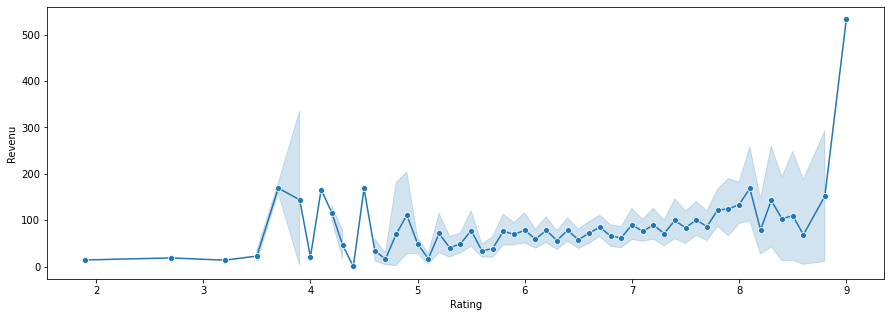

In [96]:
plt.figure(figsize=(15,5))
df.rename(columns={'Revenue (Millions)':'Revenu'},inplace=True)
rat = df.Rating.sort_values()
rev = df.Revenu.sort_values()
# plt.plot(rat,rev,'r--d')
# plt.xlabel('Rating')
# plt.ylabel('Revenu')
sns.lineplot(rat,rev,data=df,marker='o')


# 20. Classify Movies Based on Ratings [Excellent, Good, and Average]

In [98]:
l = []
for i in df.Rating:
    if i >= 7.0:
        l.append('Excellent')
    elif i >= 4.0:
        l.append('Average')
    else:
        l.append('Good')
print(l)

['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Average', 'Average', 'Excellent', 'Average', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Average', 'Average', 'Excellent', 'Average', 'Excellent', 'Excellent', 'Average', 'Excellent', 'Average', 'Average', 'Average', 'Average', 'Excellent', 'Average', 'Average', 'Average', 'Average', 'Excellent', 'Excellent', 'Excellent', 'Average', 'Excellent', 'Excellent', 'Excellent', 'Average', 'Excellent', 'Average', 'Excellent', 'Good', 'Excellent', 'Average', 'Average', 'Excellent', 'Average', 'Excellent', 'Good', 'Excellent', 'Average', 'Average', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Average', 'Average', 'Average', 'Average', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Average', 'Excellent', 'Excellent', 'Average', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Average', 'Excellent', 'Excellent', 'Ex

<AxesSubplot:xlabel='Rating', ylabel='count'>

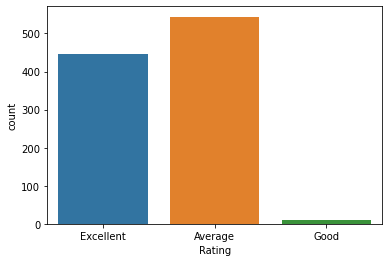

In [103]:
df['Rating']= l
df.Rating.value_counts()
sns.countplot(x = 'Rating',data=df)

# 21. Count Number of Action Movies

In [28]:
count = 0
act = 'Action'
l = list(df.Genre[:len(df)])
for i in l:
    if act in i:
        count += 1
print(count)

# df["Genre"].str.contains("action",case=False).sum()
# [count += 1 for i in l if act in i] ### What is wrong in this line??

303


In [107]:
 ### What is wrong in this line??

[]

# 22. Find Unique Values From Genre 

In [29]:
df.Genre.unique()
# This code gives multiple keywords related to genre as a single element of list.
#  so keywords are repeted in many elements of list.

array(['Action,Adventure,Sci-Fi', 'Adventure,Mystery,Sci-Fi',
       'Horror,Thriller', 'Animation,Comedy,Family',
       'Action,Adventure,Fantasy', 'Comedy,Drama,Music', 'Comedy',
       'Action,Adventure,Biography', 'Adventure,Drama,Romance',
       'Adventure,Family,Fantasy', 'Biography,Drama,History',
       'Animation,Adventure,Comedy', 'Action,Comedy,Drama',
       'Action,Thriller', 'Biography,Drama', 'Drama,Mystery,Sci-Fi',
       'Adventure,Drama,Thriller', 'Drama', 'Crime,Drama,Horror',
       'Action,Adventure,Drama', 'Drama,Thriller',
       'Action,Adventure,Comedy', 'Action,Horror,Sci-Fi',
       'Adventure,Drama,Sci-Fi', 'Action,Adventure,Western',
       'Comedy,Drama', 'Horror', 'Adventure,Drama,Fantasy',
       'Action,Crime,Thriller', 'Action,Crime,Drama',
       'Adventure,Drama,History', 'Crime,Horror,Thriller',
       'Drama,Romance', 'Comedy,Drama,Romance', 'Horror,Mystery,Thriller',
       'Crime,Drama,Mystery', 'Drama,Romance,Thriller',
       'Drama,History,T

In [30]:
# This code gives unique keywords in the genre column of dataset
l = list(df.Genre[:len(df)])
l_gen = []
for sentence in l:
    ls = sentence.split(',')
    for word in ls:
        if word not in l_gen:
            l_gen.append(word)
print(l_gen)

['Action', 'Adventure', 'Sci-Fi', 'Mystery', 'Horror', 'Thriller', 'Animation', 'Comedy', 'Family', 'Fantasy', 'Drama', 'Music', 'Biography', 'Romance', 'History', 'Crime', 'Western', 'War', 'Musical', 'Sport']


# 23. How Many Films of Each Genre Were Made?

In [31]:
df.Genre.value_counts()

Action,Adventure,Sci-Fi    50
Drama                      48
Comedy,Drama,Romance       35
Comedy                     32
Drama,Romance              31
                           ..
Action,Comedy,Family        1
Action,Crime,Fantasy        1
Comedy,Mystery              1
Adventure,Comedy,Horror     1
Comedy,Family,Fantasy       1
Name: Genre, Length: 207, dtype: int64